In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [4]:
h = 0.05         #h : time-step size
n = int(200/h)    # number of time steps for Euler method =>  n = T/dt = 200/h
N = 500           #number of oscillators - 2000 fot this part!
r = 0            #order parameter


s = np.random.uniform(-0.5, 0.5, N)    # random uniform prob distribution between (-/+ 0.5)


#t = np.random.uniform(0,2*math.pi,N)     #uniform dist of possible theta values
#theta_j = t                              #every other choice of theta

###

start = time.time()


av = 10
K = 1
R = np.zeros(shape=(av,n))



for a in range(av):         #averaging over av-runs
    
    
    cos_sum = 0
    sin_sum = 0
    Ra = np.zeros(n)
    
    t = np.random.uniform(0,2*math.pi,N)     #uniform dist of possible theta values
    theta_j = t

    for l in range(n):  

        for osc_idx in range(N):

            sin_sum_dtheta_t = 0

            for m in range(N):           #interaction

                sin_sum_dtheta_t += math.sin(theta_j[m] - theta_j[osc_idx])

            theta_dot = s[osc_idx] + (K/N)*(sin_sum_dtheta_t)

            theta_j[osc_idx] += theta_dot*h


        cos_sum = np.sum(np.cos(theta_j))
        sin_sum = np.sum(np.sin(theta_j))

        r = (1/N)*((cos_sum)**2 + (sin_sum)**2)**0.5
        R[a][l] = r
        #Ra[l] += R[l]
        

        
        
elapsed = time.time() - start
print("This took: ", elapsed, "seconds")

This took:  4729.619113206863 seconds


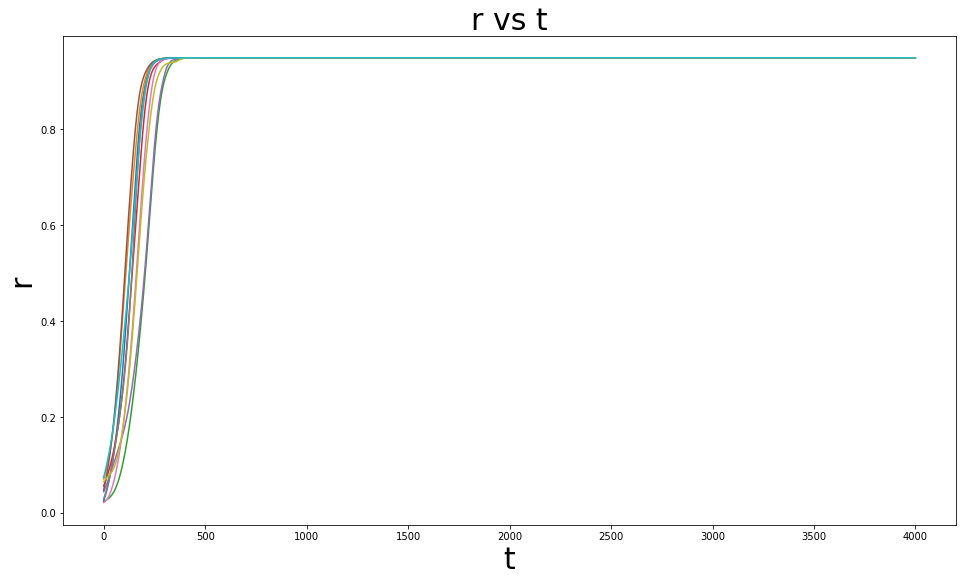

In [5]:
X = np.array(range(n))

plt.figure(figsize=[16,9])

for b in range(10):
    plt.plot(X, R[b])
    plt.title("r vs t",fontsize=30)
    plt.xlabel('t',fontsize = 30)
    plt.ylabel('r',fontsize = 30)
plt.show() 